In [1]:
import sys;
sys.path.insert(0, '..')

## Chapter 7 Code Snippets and Listings

### Periodic patterns in sound waves (section 7.1.1)

For example, for $N = 8$, we can define discrete samples of the signal using the following Python code:

In [2]:
from math import sqrt, pi, cos

N = 8
frequency = 1.7
samples = [1/sqrt(8)*cos(2 * pi * frequency * (t / N)) for t in range(N)]

We can visualize the wave and the 8 values we computed above:

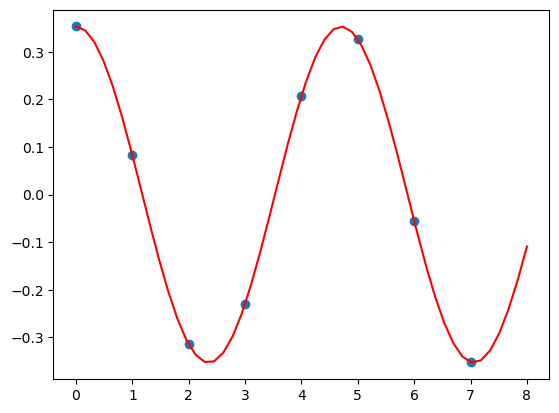

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, N, 50)
wave = [1/sqrt(8)*cos(2 * pi * frequency * (t/N)) for t in x]
plt.plot(x, wave, label='signal', color='red')
plt.scatter(range(N), samples)
plt.show()

### Periodic patterns in quantum states (section 7.1.2)

We can create a quantum state with amplitudes that are discrete samples of this complex signal with a given `theta` (for example, $\frac{\pi}{3}$) using the following code:

In [4]:
from util import cis
from math import sin

theta = pi/3
state = [sqrt(1/N) * cis(k*theta) for k in range(N)]

Remember, we can use the shortcut function `cis` defined as:

In [5]:
def cis(theta):
    return cos(theta) + 1j*sin(theta)

Listing 7.1 Function for creating a geometric sequence state

In [6]:
def geom(n, theta):
    N = 2**n
    return [sqrt(1/N) * cis(k*theta) for k in range(N)]

Let's use it to create a 3-qubit quantum state that is a geometric sequence with $\theta = \frac{\pi}{3}$:

In [7]:
state = geom(3, pi/3)

Let's look at the phase of each of the amplitudes:

In [8]:
from math import atan2

for k in range(len(state)):
    print("phase of amplitude ", k, ":", round(atan2(state[k].imag, state[k].real), 5))

phase of amplitude  0 : 0.0
phase of amplitude  1 : 1.0472
phase of amplitude  2 : 2.0944
phase of amplitude  3 : 3.14159
phase of amplitude  4 : -2.0944
phase of amplitude  5 : -1.0472
phase of amplitude  6 : -0.0
phase of amplitude  7 : 1.0472


Let's create a 3-qubit quantum state which is a geometric sequence with $\theta = \frac{\pi}{6}$:

In [9]:
state = geom(3, pi/6)

Listing 7.2 Create the circuit for encoding a geometric sequence state

In [10]:
from sim_circuit import *

def geometric_sequence_circuit(n, v):
    theta = v*2*pi/2**n

    q = QuantumRegister(n)
    qc = QuantumCircuit(q)

    for j in range(n):
        qc.h(q[j])

    for j in range(n):
        qc.p(2 ** j * theta, q[j])

    return qc

Let's we use this function to encode our example samples (`v = 1.7`):

In [11]:
n = 3
v = 1.7
qc = geometric_sequence_circuit(n, v)
state = qc.run()

In [12]:
from util import print_state_table

print_state_table(state)


Outcome  Binary  Amplitude           Magnitude  Direction  Amplitude Bar             Probability
------------------------------------------------------------------------------------------------
0        000     0.3536 + i0.0000    0.3536        0.00°   ████████                  0.125 
1        001     0.0825 + i0.3438    0.3536       76.51°   ████████                  0.125 
2        010    -0.3150 + i0.1605    0.3536      153.00°   ████████                  0.125 
3        011    -0.2296 - i0.2688    0.3536     -130.50°   ████████                  0.125 
4        100     0.2078 - i0.2860    0.3536      -54.00°   ████████                  0.125 
5        101     0.3266 + i0.1353    0.3536       22.50°   ████████                  0.125 
6        110    -0.0553 + i0.3492    0.3536       99.00°   ████████                  0.125 
7        111    -0.3525 + i0.0277    0.3536      175.51°   ████████                  0.125 



In this state, all the amplitudes match those of the example signal, $\frac{1}{\sqrt{8}}$, and the directions reflect the expected frequency of 1.7. We can check this using the code below:

In [13]:
from util import all_close

theta = v*2*pi/2**n
assert all_close(state, [sqrt(1/2**n) * cis(k*theta) for k in range(2**n)])

### Roots of unity and their geometric sequences (section 7.1.3)

Let's check that $\omega_N^N = 1$ for $N=8$:

In [14]:
N = 8
omega = cis(2*pi/N)
print(abs(omega**N))

1.0


In code, we can express the power sequence corresponding to $\omega_N$ as:

In [15]:
omega = cis(2*pi/N)
sequence = [omega**k for k in range(N)]

We can also use the `cis` function to do the same:

In [16]:
N = 8
sequence_cis = [cis(l*2*pi/N) for l in range(N)]

assert all_close(sequence, sequence_cis)

### Converting from phase to magnitude encoding with the Hadamard gate (section 7.2)

For example, let's represent the frequency $\frac{1}{3}$ in a single-qubit state.
To do this, we will prepare a single-qubit geometric sequence state with the angle $\theta = \frac{\pi}{3}$:

In [17]:
state = geom(1, pi/3)

In [18]:
print_state_table(state)


Outcome  Binary  Amplitude           Magnitude  Direction  Amplitude Bar             Probability
------------------------------------------------------------------------------------------------
0        0       0.7071 + i0.0000    0.7071        0.00°   ████████████████          0.5   
1        1       0.3536 + i0.6124    0.7071       60.00°   ████████████████          0.5   



If we apply an additional Hadamard gate, the magnitudes of both amplitudes will change.
Let's look at the following implementation:

In [19]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)

theta = pi/3
qc.h(q[0])
qc.p(theta, q[0])
qc.h(q[0])

state = qc.run()

In [20]:
print_state_table(state)


Outcome  Binary  Amplitude           Magnitude  Direction  Amplitude Bar             Probability
------------------------------------------------------------------------------------------------
0        0       0.7500 + i0.4330    0.866        30.00°   ████████████████████      0.75  
1        1       0.2500 - i0.4330    0.5         -60.00°   ███████████               0.25  



In this state, the encoded angle is translated in the magnitudes of the amplitudes. The amplitudes of the resulting state have magnitudes $\cos \frac{\theta}{2}$ and $\sin \frac{\theta}{2}$:

In [21]:
from util import is_close

theta = pi/3
assert is_close(abs(state[0]), cos(theta/2))
assert is_close(abs(state[1]), sin(theta/2))

### The classical (discrete) Fourier transform (section 7.3.1)

We can represent each Fourier basis in Python code with a list:

In [22]:
N = 4
omega = cis(2*pi/N)

F_0 = [omega**(0*k) for k in range(N)]
F_1 = [omega**(1*k) for k in range(N)]
F_2 = [omega**(2*k) for k in range(N)]
F_3 = [omega**(3*k) for k in range(N)]

If we inspect the first basis, we see that its components are equal to 1:

In [23]:
print(F_0)

[(1+0j), (1+0j), (1+0j), (1+0j)]


Alternatively, we can use the following code to find the Fourier bases:

In [24]:
N = 4

F_0 = [cis(k*0*2*pi/N) for k in range(N)]
F_1 = [cis(k*1*2*pi/N) for k in range(N)]
F_2 = [cis(k*2*2*pi/N) for k in range(N)]
F_3 = [cis(k*3*2*pi/N) for k in range(N)]

Let's return to our earlier example of samples from a sinusoidal wave:

In [25]:
N = 8
frequency = 1.7
samples = [1/sqrt(N)*cos(2 * pi * frequency * (i / N)) for i in range(N)]

To get the first item of the DFT of this signal, we need to compute the inner product between the discrete signal and the corresponding Fourier basis ($F_0$). We can use the `inner` function defined in chapter 6:

In [26]:
def inner(v1, v2):
    assert(len(v1) == len(v2))
    return sum(z1*z2.conjugate() for z1, z2 in zip(v1, v2))

Now, we can get the first item:

In [27]:
F_0 = [cis(k*0*2*pi/N) for k in range(N)]
similarity = inner(samples, F_0)

print(round(similarity.real, 5) + 1j*round(similarity.imag, 5))

(0.01814+0j)


We can compute the entire sequence with a list comprehension:

In [28]:
dft = [inner(samples, [cis(k*l*2*pi/N) for k in range(N)]) for l in range(8)]

for x in dft:
    print(round(x.real, 5) + 1j*round(x.imag, 5))

(0.01814+0j)
(-0.11374+0.34545j)
(0.93169-0.99125j)
(0.40522-0.17397j)
(0.36394+0j)
(0.40522+0.17397j)
(0.93169+0.99125j)
(-0.11374-0.34545j)


Let's check that these results match what we get when we use `numpy`:

In [29]:
f = np.fft.fft(samples)

for x in f:
    print(round(x.real, 5) + 1j*round(x.imag, 5))

(0.01814+0j)
(-0.11374+0.34545j)
(0.93169-0.99125j)
(0.40522-0.17397j)
(0.36394+0j)
(0.40522+0.17397j)
(0.93169+0.99125j)
(-0.11374-0.34545j)


### Introducing the QFT and IQFT (section 7.3.2)

Listing 7.3 Computing the Fourier basis for a given `N` and `l`

In [30]:
def fourier_basis(N, l):
    return [1/sqrt(N) * cis(k*l*2*pi/N) for k in range(N)]

Listing 7.4 Classical implementation of the IQFT

In [31]:
def icft(state):
    N = len(state)
    s = [state[k] for k in range(N)]

    for k in range(N):
        state[k] = inner(s, fourier_basis(N, k))

Listing 7.5 Classical implementation of the QFT

In [32]:
def cft(state):
    N = len(state)
    s = [state[k] for k in range(N)]

    for k in range(N):
        state[k] = inner(s, fourier_basis(N, -k))

### Quantum circuits for the QFT and IQFT (section 7.4)

Listing 7.6 Quantum circuits for the QFT and IQFT

In [33]:
def qft(qc, targets, swap=True):
    for j in range(len(targets))[::-1]:
        qc.h(targets[j])
        for k in range(j)[::-1]:
            qc.cp(pi * 2.0 ** (k - j), targets[j], targets[k])

    if swap:
        qc.mswap(targets)


def iqft(qc, targets, swap=True):
    for j in range(len(targets))[::-1]:
        qc.h(targets[j])
        for k in range(j)[::-1]:
            qc.cp(-pi * 2 ** (k - j), targets[j], targets[k])

    if swap:
        qc.mswap(targets)

class QFT(QuantumCircuit):
    def __init__(self, m, reversed=False, swap=True):
        super().__init__(QuantumRegister(m))
        targets = range(m)
        if reversed:
            targets = targets[::-1]

        qft(self, targets, swap)


class IQFT(QuantumCircuit):
    def __init__(self, m, reversed=False, swap=True):
        super().__init__(QuantumRegister(m))
        targets = range(m)
        if reversed:
            targets = targets[::-1]

        iqft(self, targets, swap)

Listing 7.7 Methods to append QFT and IQFT to a circuit instance

**Note:** these will be added to the `QuantumCircuit` class

In [34]:
def append_qft(self, reg, reversed=False, swap=True):
    self.append(QFT(len(reg), reversed, swap), reg)

def append_iqft(self, reg, reversed=False, swap=True):
    self.append(IQFT(len(reg), reversed, swap), reg)

**Efficient classical implementation**

The following is a much more efficient version of the classical implementation of the IQFT shown in the previous section.

In [35]:
def classical_inverse_fourier(state, step, targets):
    n = len(targets)
    sq2 = sqrt(2)
    sq2i = 1/sqrt(2)
    for j in range(n)[::-1]:
        dist = 2**j
        rot = cis(-pi/dist)
        rots = [1 for _ in range(dist)]
        r = 1
        for m in range(dist):
            rots[m] = r
            r = r*rot

        for l in range(2**(n-j-1)):
            i = 0
            for k in range(2*l*dist, (2*l+1)*dist):
                state[k] = sq2i*(state[k] + state[k+dist])
                state[k+dist] = (state[k] - sq2*state[k+dist])*rots[i]
                i += 1

### Understanding the IQFT step-by-step (section 7.4.1)

Here is how the successive division method works. We start by dividing a given decimal number (13) by 2 and record the quotient and remainder. Since $13 = 6\cdot2 + 1$, the quotient is 6 and the remainder is 1. The remainder (1) is the first binary digit of the given number (starting from the right).

Python has a built-in function called `divmod` that gives the quotient and remainder of a division. If we use it, we get the expected results:

In [36]:
divmod(13, 2)

(6, 1)

We continue the process by applying `divmod` to the quotients:

In [37]:
divmod(6, 2)

(3, 0)

In [38]:
divmod(3, 2)

(1, 1)

In [39]:
divmod(1, 2)

(0, 1)